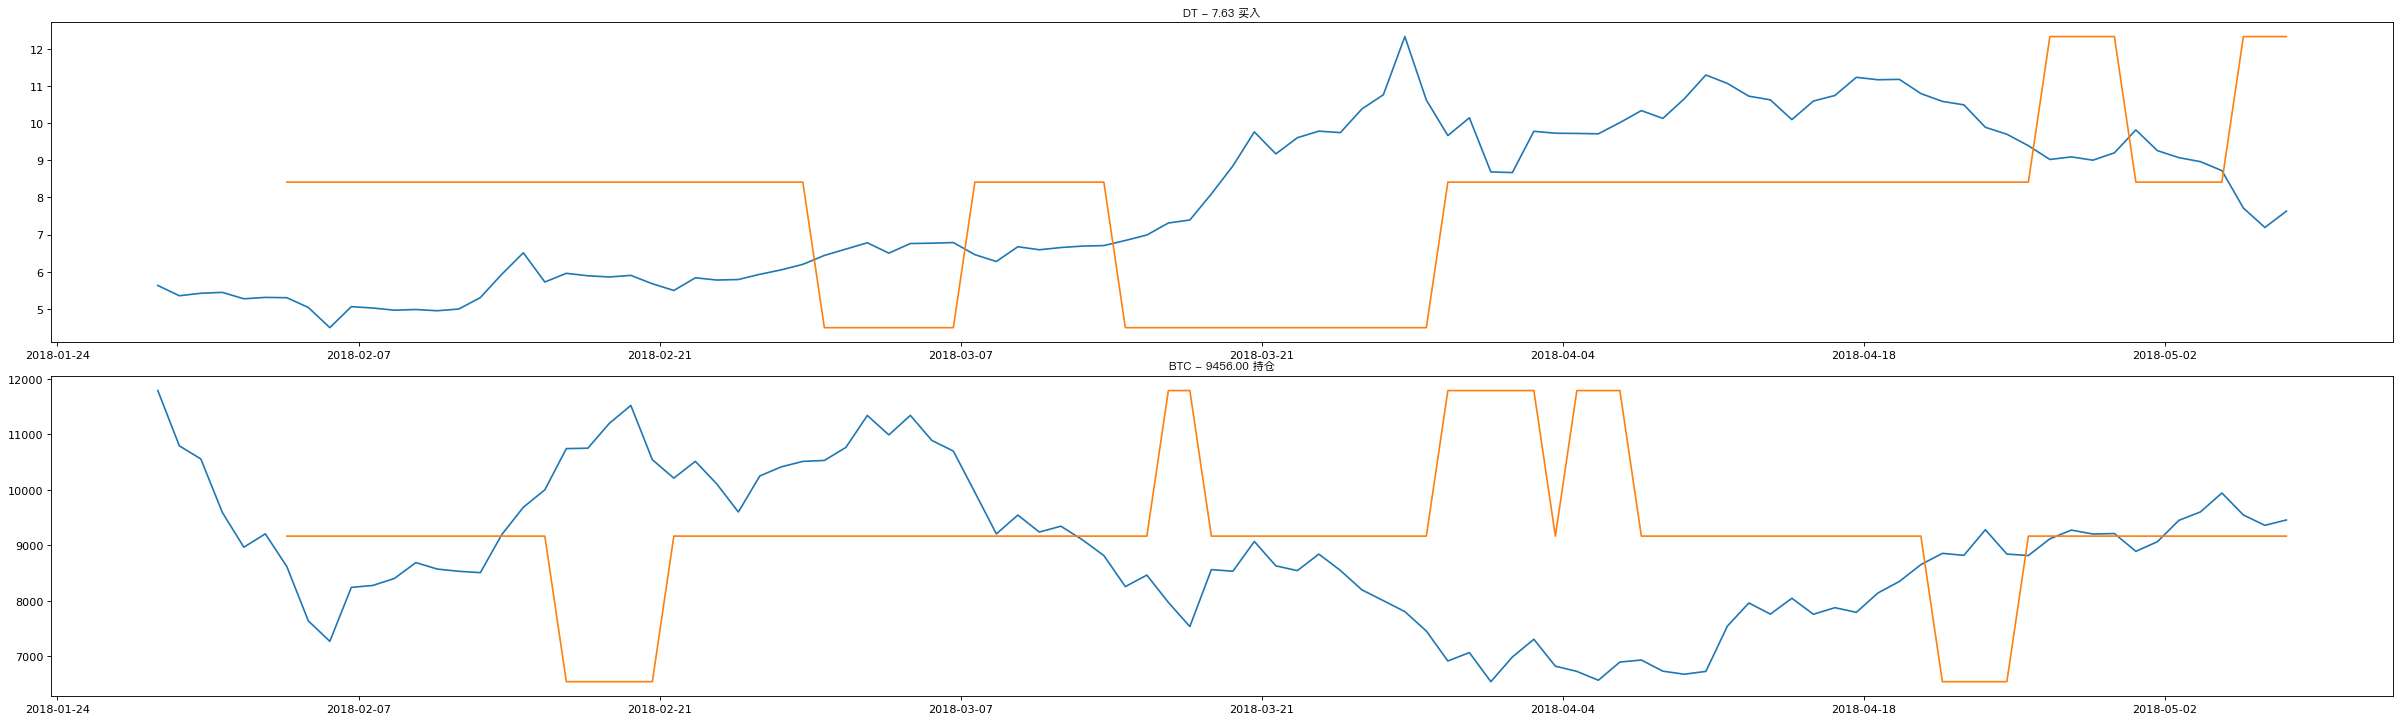

In [1]:
#coding:utf-8  
import sys
import os
# cur_path = os.path.dirname(os.path.abspath(__file__))
sys.path.append('../')
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
import matplotlib.finance
import random
from scipy.signal import find_peaks_cwt
import dc_lib 
import candle
import ffn
import dc_kdj_lib as kdj
import coins as stock_lib
import matplotlib.animation as animation
import stock_loader as loader
import time
import matplotlib
from matplotlib.font_manager import FontManager, FontProperties  
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc')  

plt.rcParams['figure.figsize'] = (30, 9)
plt.rcParams['figure.dpi'] = 80

stocks = stock_lib.g_coins
stocks = {'104':'DT','101':'BTC'}

fig,ax_list = plt.subplots(nrows=len(stocks), ncols=1)
coin_plots = {}
coin_ids = []
plt.tight_layout()

i = 0
for k,code in stocks.items():
    coin_ids.append(code)
    coin_plots[code]=ax_list[i]
    i+=1

loader.init(stocks)

def check(code,ax):
    coin_id = stock_lib.get_id(code)
    kdj_config = kdj.get_conf(coin_id)
    kline = loader.get_kline(code)
    df = dc_lib.convert_candle_dataframe(kline)
    kdj_data = kdj.get_kdj(coin_id,df,sell_ratio=1)
    
    close = kdj_data.close
    kd_signal = kdj_data.kd_signal
    kd_trade = pd.Series(kd_signal.values.copy(), index=kd_signal.index.copy(),
                              name='trade')
    min_close_price = min(close)
    max_close_price = max(close)
    kd_trade[kd_signal>0] = max_close_price
    kd_trade[kd_signal == 0] = (max_close_price-min_close_price)/2+min_close_price
    kd_trade[kd_signal<0] = min_close_price
    ax.clear()
    signal = kd_signal[len(kd_signal)-1]
    ax.set_title('%s - %.2f %s'%(code,close[len(close)-1],'买入' if signal>0 else '卖出' if signal<0 else '持仓'), fontproperties=getChineseFont())
    ax.plot(close)
    ax.plot(kd_trade)
    return signal

# def animate(i):
for code,ax in coin_plots.items():
    check(code,ax)
#         time.sleep(1)
# animate(0)
plt.show()